In [4]:
import pandas as pd
import numpy as np
import warnings
from qiskit import IBMQ
from qiskit import *
import os
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import pandas as pd
from qiskit import Aer, QuantumCircuit, execute
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.utils import QuantumInstance
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore", category=DeprecationWarning)
from qiskit import IBMQ
import matplotlib.pyplot as plt
from qiskit_algorithms.utils import algorithm_globals
algorithm_globals.random_seed = 12345
print('complete')

complete


In [5]:
print(os.getcwd())

C:\Users\theda


In [6]:
data_full = pd.read_csv('crop yield data sheet - Copy.csv')
data = data_full.sample(frac=1.0)
        
print (len(data_full))
print (len(data))
data.head(6)

98
98


,1,2,3,4,5,6,7
79,445,65,39,65,21,19,8
55,455,58,37,61,21,18,8
92,1150,78,29,77,21,18,9
53,400,52,38,64,19,15,7
46,1275,76,26,75,24,19,11
85,450,70,36,72,25,18,8


In [7]:
data_array1 = np.array(data['1'])
data_array2 = np.array(data['2'])
data_array3 = np.array(data['3'])
data_array4 = np.array(data['4'])
data_array5 = np.array(data['5'])
data_array = np.vstack((data_array1, data_array2, data_array3, data_array4, data_array5)).T
print(data_array)

[[ 445   65   39   65   21]
 [ 455   58   37   61   21]
 [1150   78   29   77   21]
 [ 400   52   38   64   19]
 [1275   76   26   75   24]
 [ 450   70   36   72   25]
 [ 410   50   37   59   19]
 [1280   76   26   75   24]
 [ 450   65   38   60   20]
 [1300   70   24   70   22]
 [ 425   55   38   65   19]
 [1220   77   29   75   22]
 [1175   70   28   70   22]
 [1225   75   28   79   21]
 [ 475   72   36   71   21]
 [1200   75   27   79   21]
 [ 400   50   40   60   18]
 [1225   79   24   79   22]
 [ 475   60   39   70   20]
 [1280   73   28   75   24]
 [1250   77   28   76   22]
 [ 425   65   37   67   18]
 [1220   79   28   77   23]
 [1225   73   29   73   23]
 [1200   73   29   73   23]
 [ 400   60   39   60   18]
 [1200   80   27   79   22]
 [ 440   58   37   66   22]
 [1225   75   28   75   23]
 [1300   80   28   80   24]
 [1225   75   29   77   23]
 [ 450   65   39   70   20]
 [ 405   55   36   60   21]
 [ 410   52   40   62   19]
 [ 450   65   35   70   19]
 [1245   78   27   7

In [24]:
target_array = data["7"] 
for i in range(len(target_array)):

    if target_array[i] < 10:
        target_array[i] = 0


    if target_array[i] > 9:
        target_array[i] = 1

print(target_array)

79    0
55    0
92    0
53    0
46    1
     ..
80    1
67    0
14    1
17    0
1     0
Name: 7, Length: 98, dtype: int64


In [9]:
features = data_array
labels = np.array(target_array)

In [10]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

In [13]:
feature_names = ['1', '2', '3', '4', '5']
feature_names_array = np.array(feature_names)
print(feature_names_array)

['1' '2' '3' '4' '5']


D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Coding\envs\Qiskit\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When 

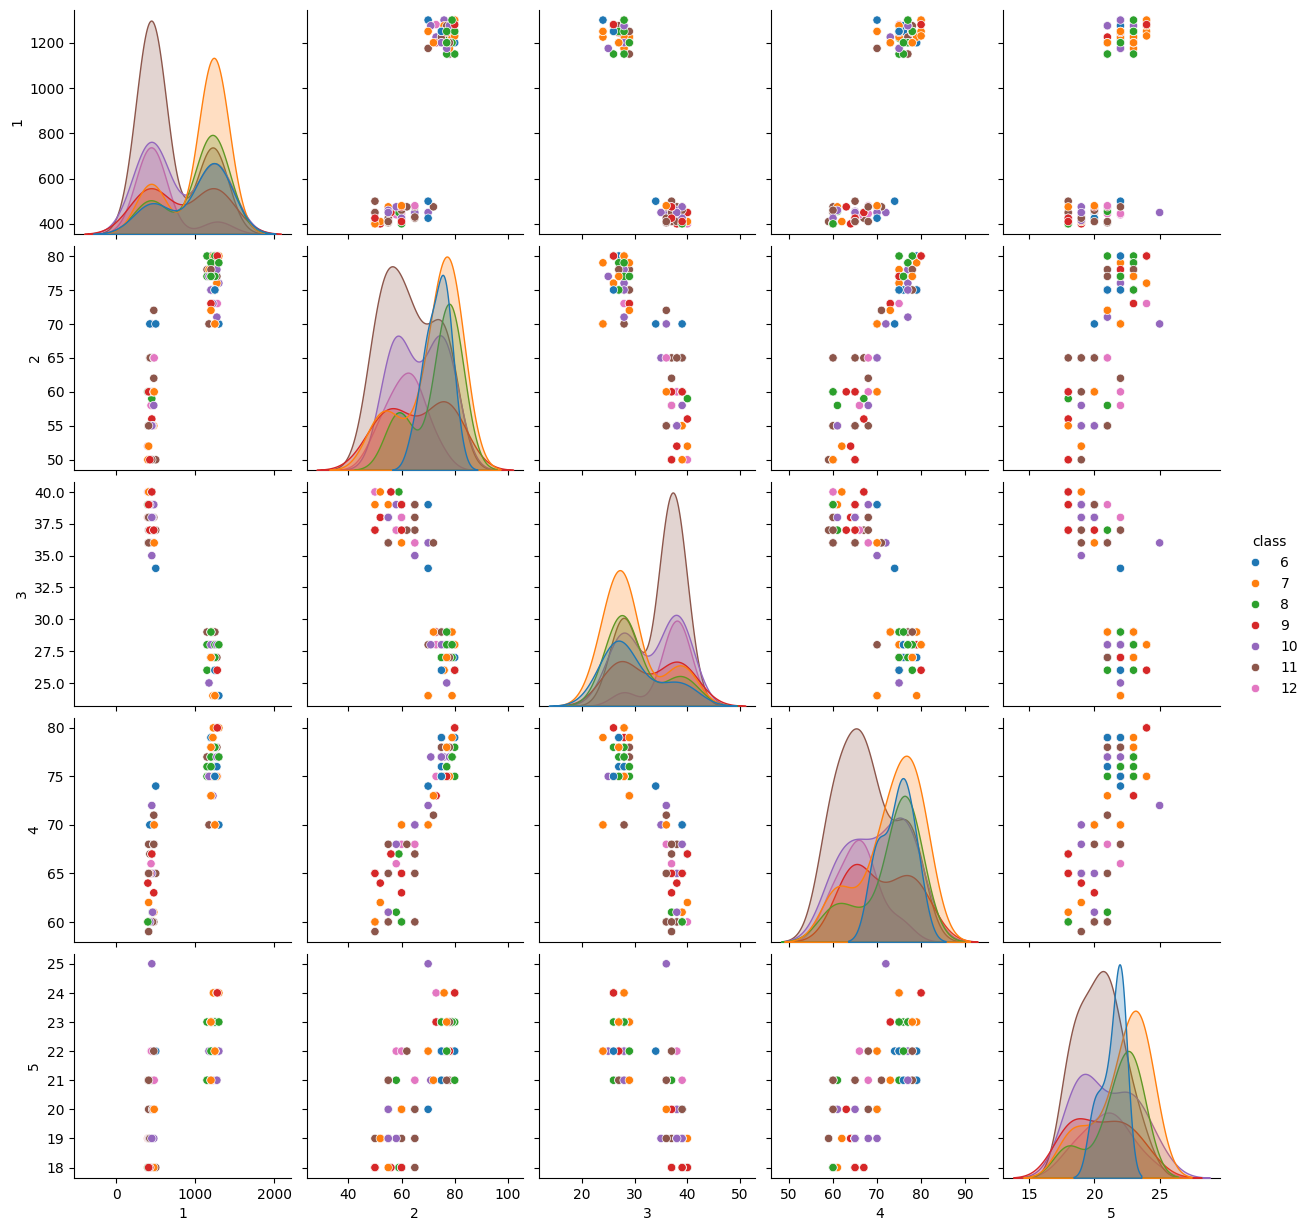

In [14]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data_array, columns=feature_names_array)
df["class"] = pd.Series(target_array)

sns.pairplot(df, hue="class", palette="tab10")

In [15]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
)

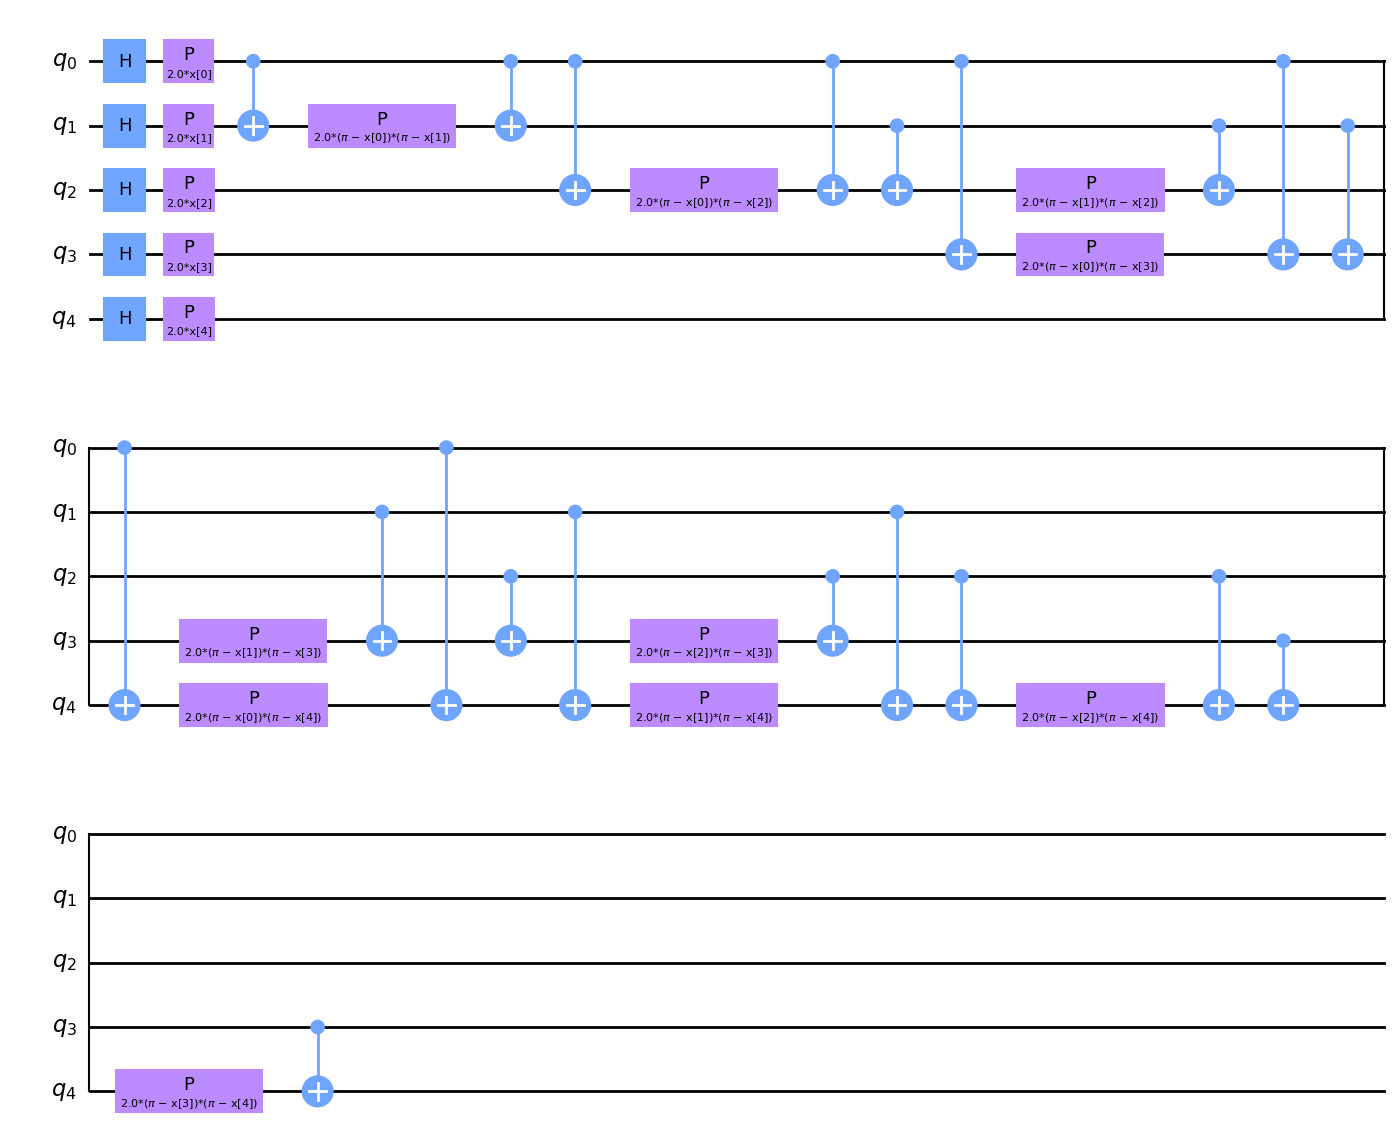

In [16]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

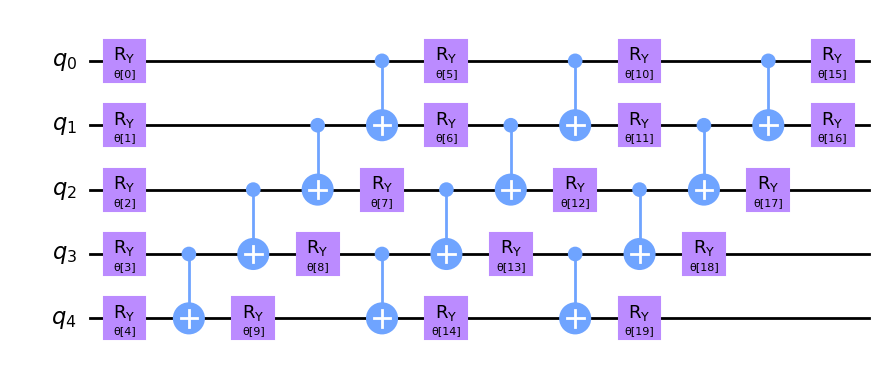

In [17]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [18]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [19]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [20]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

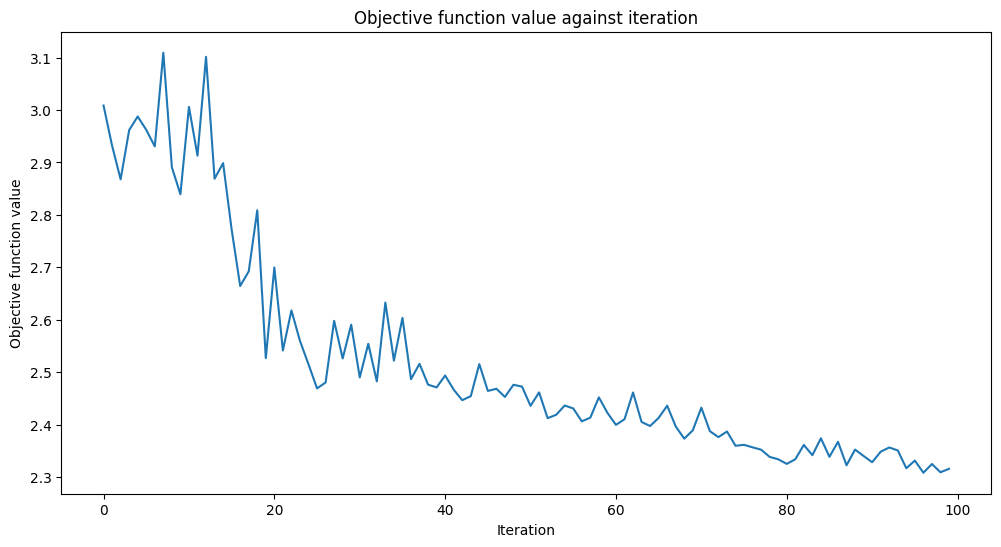

Training time: 159 seconds


In [21]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
print(train_labels[:5])
print(train_features[:5])
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [23]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.37
Quantum VQC on the test dataset using RealAmplitudes:     0.17
